# IRIS FHIR SQL Builder, Ready25 workshop

### 1. Install Libraries

Make sure that you choose the virtual environment with juypter installed first.  

pip install notebook ipykernel  
Register the venv so Jupyter can see it:  
python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"  
Replace "myenv" with a name you’ll recognize (like "FHIR venv").

##### 1.1. List your installed Python modules

In [6]:
pip list

406.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Package                   Version
------------------------- --------------
anyio                     4.9.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
certifi                   2025.4.26
cffi                      1.17.1
charset-normalizer        3.4.2
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema            2.21.1
fonttools                 4.57.0
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
idna                      3.10
intersystems-i

##### 1.2. Install any missing libraries (if not done previously)

In [7]:
pip install pandas

478.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install numpy

489.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

815.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### 1.3. Install the IRIS DB-API driver

In case you don't have the intersystems-irispython package installed yet, download the DB-API driver from
https://intersystems-community.github.io/iris-driver-distribution/
and place it into the directory of your jupyter notebook file. Then run the following pip command:

In [11]:
pip install intersystems_irispython-3.2.0-py3-none-any.whl

838.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Processing ./intersystems_irispython-3.2.0-py3-none-any.whl
intersystems-irispython is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 2. Import Libraries

In [12]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### 3. Create Allergy dataframe

#### 3.1. Connect to IRIS using DB-API

In [13]:
import iris

In [16]:
connection_string = "127.0.0.1:1972/DEMO"
username = "_system"
password = "ISCDEMO"
connection = iris.connect(connection_string, username, password)

In [18]:
sql = "SELECT * FROM sql2.Patient"
patientFrame = pd.read_sql(sql, connection)

In [46]:
sql = "SELECT * FROM sql3.AllergyIntolerance"
allergyFrame = pd.read_sql(sql, connection)

#### 3.2. ONLY IF OFFLINE: Load the local file into an "Allergy" dataframe (optional)

In [ ]:
# This is an alternative if not connecting directly to IRIS using the DB-API driver
allergyFrame = pd.read_csv('AllergyIntolerance_2024.csv')

#### 3.3. Get information about this frame

From now on we are working with pandas dataframes. Please don't just click through the cells, but also try to understand what is achieved with the various functions. For a detailed reference you may visit this web page:
https://pandas.pydata.org/docs/reference/frame.html

In [47]:
allergyFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                74 non-null     int64 
 1   AllergyCode       74 non-null     object
 2   AllergyDisplay    74 non-null     object
 3   Key               74 non-null     object
 4   LastUpdated       74 non-null     object
 5   PatientReference  74 non-null     object
 6   RowNum            74 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 4.2+ KB


#### 3.4. Show the first 5 rows

In [49]:
allergyFrame.head()

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10T11:57:30Z,Patient/1531,1540
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,Patient/1531,1541
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,Patient/14013,14028
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10T11:57:33Z,Patient/14013,14029
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10T11:57:34Z,Patient/16035,16044


#### 3.5. Get the number of unique values in each column

In [50]:
allergyFrame.nunique()

ID                  74
AllergyCode          2
AllergyDisplay      12
Key                 74
LastUpdated         13
PatientReference    21
RowNum              74
dtype: int64

In [51]:
allergyFrame.loc[[0,1,2]]

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10T11:57:30Z,Patient/1531,1540
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,Patient/1531,1541
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,Patient/14013,14028


#### 3.6. Display only the AllergyCode, AllergyDisplay, and PatientReference

In [52]:
allergyFrame.loc[:, ["AllergyCode", "AllergyDisplay", "PatientReference"]]

,AllergyCode,AllergyDisplay,PatientReference
0,active,Allergy to mould,Patient/1531
1,active,Shellfish allergy,Patient/1531
2,active,Shellfish allergy,Patient/14013
3,active,Allergy to fish,Patient/14013
4,active,House dust mite allergy,Patient/16035
...,...,...,...
69,active,Allergy to fish,Patient/56679
70,active,Allergy to bee venom,Patient/59145
71,active,Allergy to mould,Patient/59145
72,active,Allergy to tree pollen,Patient/59145


#### 3.7. Get just the Allergy Display Column

In [53]:
allergyFrame.AllergyDisplay

0            Allergy to mould
1           Shellfish allergy
2           Shellfish allergy
3             Allergy to fish
4     House dust mite allergy
               ...           
69            Allergy to fish
70       Allergy to bee venom
71           Allergy to mould
72     Allergy to tree pollen
73         Allergy to peanuts
Name: AllergyDisplay, Length: 74, dtype: object

#### 3.8. Sort the AllergyDisplay column alphabetically

In [54]:
allergyFrame.sort_values("AllergyDisplay")

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
70,59154,active,Allergy to bee venom,AllergyIntolerance/59154,2025-04-10T11:57:47Z,Patient/59145,59154
35,36653,active,Allergy to bee venom,AllergyIntolerance/36653,2025-04-10T11:57:39Z,Patient/33388,36653
61,56531,active,Allergy to bee venom,AllergyIntolerance/56531,2025-04-10T11:57:47Z,Patient/56522,56531
51,51705,active,Allergy to bee venom,AllergyIntolerance/51705,2025-04-10T11:57:46Z,Patient/51696,51705
28,27246,active,Allergy to bee venom,AllergyIntolerance/27246,2025-04-10T11:57:38Z,Patient/27237,27246
...,...,...,...,...,...,...,...
31,27249,active,Shellfish allergy,AllergyIntolerance/27249,2025-04-10T11:57:38Z,Patient/27237,27249
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,Patient/14013,14028
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,Patient/1531,1541
56,52087,active,Shellfish allergy,AllergyIntolerance/52087,2025-04-10T11:57:45Z,Patient/52078,52087


#### 3.9. Find all rows where the allergyintolerance is active

In [55]:
allergyFrame.loc[allergyFrame['AllergyCode'] == 'active']

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10T11:57:30Z,Patient/1531,1540
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,Patient/1531,1541
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,Patient/14013,14028
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10T11:57:33Z,Patient/14013,14029
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10T11:57:34Z,Patient/16035,16044
...,...,...,...,...,...,...,...
69,56690,active,Allergy to fish,AllergyIntolerance/56690,2025-04-10T11:57:47Z,Patient/56679,56690
70,59154,active,Allergy to bee venom,AllergyIntolerance/59154,2025-04-10T11:57:47Z,Patient/59145,59154
71,59155,active,Allergy to mould,AllergyIntolerance/59155,2025-04-10T11:57:47Z,Patient/59145,59155
72,59156,active,Allergy to tree pollen,AllergyIntolerance/59156,2025-04-10T11:57:47Z,Patient/59145,59156


#### 3.10. Show only the AllergyCode and AllergyDisplay

In [56]:
allergyFrame.loc[allergyFrame['AllergyCode'] == 'active', ['AllergyCode', 'AllergyDisplay']]

,AllergyCode,AllergyDisplay
0,active,Allergy to mould
1,active,Shellfish allergy
2,active,Shellfish allergy
3,active,Allergy to fish
4,active,House dust mite allergy
...,...,...
69,active,Allergy to fish
70,active,Allergy to bee venom
71,active,Allergy to mould
72,active,Allergy to tree pollen


#### 3.11. alternate syntax

In [57]:
allergyFrame[allergyFrame['AllergyCode'] == 'active'][['AllergyCode', 'AllergyDisplay']]


,AllergyCode,AllergyDisplay
0,active,Allergy to mould
1,active,Shellfish allergy
2,active,Shellfish allergy
3,active,Allergy to fish
4,active,House dust mite allergy
...,...,...
69,active,Allergy to fish
70,active,Allergy to bee venom
71,active,Allergy to mould
72,active,Allergy to tree pollen


### 4. Apply more operations and functions

#### 4.1. Combining filtering operations

In [58]:
allergyFrame[(allergyFrame['AllergyCode'] == 'active') & (allergyFrame['AllergyDisplay'] == 'Allergy to peanuts')]

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
12,17244,active,Allergy to peanuts,AllergyIntolerance/17244,2025-04-10T11:57:34Z,Patient/17145,17244
27,26754,active,Allergy to peanuts,AllergyIntolerance/26754,2025-04-10T11:57:37Z,Patient/26741,26754
50,46177,active,Allergy to peanuts,AllergyIntolerance/46177,2025-04-10T11:57:44Z,Patient/46162,46177
73,59157,active,Allergy to peanuts,AllergyIntolerance/59157,2025-04-10T11:57:47Z,Patient/59145,59157


#### 4.2. Try to filter on those patients with active allergies to tree pollen

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
10,17242,active,Allergy to tree pollen,AllergyIntolerance/17242,2025-04-10T11:57:34Z,Patient/17145,17242
21,24194,active,Allergy to tree pollen,AllergyIntolerance/24194,2025-04-10T11:57:36Z,Patient/24181,24194
40,36658,active,Allergy to tree pollen,AllergyIntolerance/36658,2025-04-10T11:57:39Z,Patient/33388,36658
55,51709,active,Allergy to tree pollen,AllergyIntolerance/51709,2025-04-10T11:57:46Z,Patient/51696,51709
72,59156,active,Allergy to tree pollen,AllergyIntolerance/59156,2025-04-10T11:57:47Z,Patient/59145,59156


In [63]:
allergyFrame[(allergyFrame['AllergyCode'] == 'active') & (allergyFrame['AllergyDisplay'] == 'Allergy to peanuts')]

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
12,17244,active,Allergy to peanuts,AllergyIntolerance/17244,2025-04-10T11:57:34Z,Patient/17145,17244
27,26754,active,Allergy to peanuts,AllergyIntolerance/26754,2025-04-10T11:57:37Z,Patient/26741,26754
50,46177,active,Allergy to peanuts,AllergyIntolerance/46177,2025-04-10T11:57:44Z,Patient/46162,46177
73,59157,active,Allergy to peanuts,AllergyIntolerance/59157,2025-04-10T11:57:47Z,Patient/59145,59157


#### 4.3. Using String Operations

In [64]:
allergyFrame[allergyFrame['AllergyDisplay'].str.contains("fish", case=False)]

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,Patient/1531,1541
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,Patient/14013,14028
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10T11:57:33Z,Patient/14013,14029
5,16045,active,Shellfish allergy,AllergyIntolerance/16045,2025-04-10T11:57:34Z,Patient/16035,16045
31,27249,active,Shellfish allergy,AllergyIntolerance/27249,2025-04-10T11:57:38Z,Patient/27237,27249
42,37151,active,Shellfish allergy,AllergyIntolerance/37151,2025-04-10T11:57:41Z,Patient/37142,37151
49,46176,active,Shellfish allergy,AllergyIntolerance/46176,2025-04-10T11:57:44Z,Patient/46162,46176
56,52087,active,Shellfish allergy,AllergyIntolerance/52087,2025-04-10T11:57:45Z,Patient/52078,52087
66,56536,active,Allergy to fish,AllergyIntolerance/56536,2025-04-10T11:57:47Z,Patient/56522,56536
69,56690,active,Allergy to fish,AllergyIntolerance/56690,2025-04-10T11:57:47Z,Patient/56679,56690


### Using Regex

In [65]:
allergyFrame[allergyFrame['PatientReference'].str.contains(r'\/2(.)+$')]

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
14,20284,active,Allergy to mould,AllergyIntolerance/20284,2025-04-10T11:57:35Z,Patient/20268,20284
15,20285,active,House dust mite allergy,AllergyIntolerance/20285,2025-04-10T11:57:35Z,Patient/20268,20285
16,22524,active,Allergy to nut,AllergyIntolerance/22524,2025-04-10T11:57:36Z,Patient/22515,22524
17,24190,active,Allergy to mould,AllergyIntolerance/24190,2025-04-10T11:57:36Z,Patient/24181,24190
18,24191,active,House dust mite allergy,AllergyIntolerance/24191,2025-04-10T11:57:36Z,Patient/24181,24191
19,24192,active,Dander (animal) allergy,AllergyIntolerance/24192,2025-04-10T11:57:36Z,Patient/24181,24192
20,24193,active,Allergy to grass pollen,AllergyIntolerance/24193,2025-04-10T11:57:36Z,Patient/24181,24193
21,24194,active,Allergy to tree pollen,AllergyIntolerance/24194,2025-04-10T11:57:36Z,Patient/24181,24194
22,24195,active,Allergy to nut,AllergyIntolerance/24195,2025-04-10T11:57:36Z,Patient/24181,24195
23,26750,active,Allergy to mould,AllergyIntolerance/26750,2025-04-10T11:57:37Z,Patient/26741,26750


#### 4.4. Filtering data by isin operator

In [66]:
allergyFrame[allergyFrame['AllergyDisplay'].isin(['Allergy to tree pollen', 'Allergy to grass pollen'])]

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum
10,17242,active,Allergy to tree pollen,AllergyIntolerance/17242,2025-04-10T11:57:34Z,Patient/17145,17242
20,24193,active,Allergy to grass pollen,AllergyIntolerance/24193,2025-04-10T11:57:36Z,Patient/24181,24193
21,24194,active,Allergy to tree pollen,AllergyIntolerance/24194,2025-04-10T11:57:36Z,Patient/24181,24194
26,26753,active,Allergy to grass pollen,AllergyIntolerance/26753,2025-04-10T11:57:37Z,Patient/26741,26753
39,36657,active,Allergy to grass pollen,AllergyIntolerance/36657,2025-04-10T11:57:39Z,Patient/33388,36657
40,36658,active,Allergy to tree pollen,AllergyIntolerance/36658,2025-04-10T11:57:39Z,Patient/33388,36658
43,37546,active,Allergy to grass pollen,AllergyIntolerance/37546,2025-04-10T11:57:41Z,Patient/37538,37546
47,46174,active,Allergy to grass pollen,AllergyIntolerance/46174,2025-04-10T11:57:44Z,Patient/46162,46174
55,51709,active,Allergy to tree pollen,AllergyIntolerance/51709,2025-04-10T11:57:46Z,Patient/51696,51709
59,53869,inactive,Allergy to grass pollen,AllergyIntolerance/53869,2025-04-10T11:57:45Z,Patient/51088,53869


#### 4.5. Try to write your own query that additionally filters on the above criteria and whether the allergy is 'active'

#### 4.6. Let's see how to insert a column and populate the values base on a filter using numpy's where clause

In [67]:
allergyFrame.loc[allergyFrame['AllergyCode'] == 'active', ['AllergyCode', 'AllergyDisplay']]

,AllergyCode,AllergyDisplay
0,active,Allergy to mould
1,active,Shellfish allergy
2,active,Shellfish allergy
3,active,Allergy to fish
4,active,House dust mite allergy
...,...,...
69,active,Allergy to fish
70,active,Allergy to bee venom
71,active,Allergy to mould
72,active,Allergy to tree pollen


In [68]:
allergyFrame['Nut Allergy'] =  np.where(allergyFrame['AllergyDisplay'] == 'Allergy to nut', True, False)

In [69]:
allergyFrame.head()

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum,Nut Allergy
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10T11:57:30Z,Patient/1531,1540,False
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,Patient/1531,1541,False
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,Patient/14013,14028,False
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10T11:57:33Z,Patient/14013,14029,False
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10T11:57:34Z,Patient/16035,16044,False


#### 4.7. Lets make a copy of the allergyFrame to do modfications

In [70]:
af = allergyFrame.copy()

#### 4.8. Let's just get all the patient reference ids without the Preceding 'Patient/'

In [71]:
af['PatientReference'] = af['PatientReference'].str.split('/').str[1]

#### 4.9. Execute the command af.head() to see the transformation

In [72]:
af.head()

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum,Nut Allergy
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10T11:57:30Z,1531,1540,False
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10T11:57:30Z,1531,1541,False
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10T11:57:33Z,14013,14028,False
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10T11:57:33Z,14013,14029,False
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10T11:57:34Z,16035,16044,False


#### 4.10. Let's transform the LastUpdated column to a datetime object

In [73]:
af['LastUpdated'] = pd.to_datetime(af['LastUpdated'])

#### 4.11. Now we can get just the year of the 'LastUpdated' column

In [74]:
af['Last_Updated_Year'] = af['LastUpdated'].dt.year

#### 4.12. Check it out by executing af.head()

In [75]:
af.head()

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum,Nut Allergy,Last_Updated_Year
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10 11:57:30+00:00,1531,1540,False,2025
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10 11:57:30+00:00,1531,1541,False,2025
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10 11:57:33+00:00,14013,14028,False,2025
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10 11:57:33+00:00,14013,14029,False,2025
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10 11:57:34+00:00,16035,16044,False,2025


#### 4.13. Build a custom function to create categories of allergies

In [76]:
def categories_allergies(row):
    if row['AllergyDisplay'] == 'Shellfish allergy' or row['AllergyDisplay'] == 'Allergy to fish':
        return 'Fish'
    elif row['AllergyDisplay'] == 'Allergy to grass pollen' or row['AllergyDisplay'] == 'Allergy to tree pollen':
        return 'Pollen'
    elif row['AllergyDisplay'] == 'Allergy to dairy product' or row['AllergyDisplay'] == 'Allergy to peanuts':
        return 'Food'
    elif row['AllergyDisplay'] == 'House dust mite allergy' or row['AllergyDisplay'] == 'Dander (animal) allergy':
        return 'Animal'
    else:
        return 'Miscellaneous'

In [77]:
af['Category'] = af.apply(categories_allergies, axis=1)

axis=1 means we want to apply to all rows, where axis=0 is columns

In [78]:
af.head() ##check it out

,ID,AllergyCode,AllergyDisplay,Key,LastUpdated,PatientReference,RowNum,Nut Allergy,Last_Updated_Year,Category
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10 11:57:30+00:00,1531,1540,False,2025,Miscellaneous
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10 11:57:30+00:00,1531,1541,False,2025,Fish
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10 11:57:33+00:00,14013,14028,False,2025,Fish
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10 11:57:33+00:00,14013,14029,False,2025,Fish
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10 11:57:34+00:00,16035,16044,False,2025,Animal


### 5. Get the Patient table, after being transformed by FHIR SQL Builder

#### 5.1. Query the database directly using the DB-API

In [79]:
sql = "SELECT * FROM sql2.Patient"
patientFrame = pd.read_sql(sql, connection)

#### 5.2. ONLY IF OFFLINE: Get the Patient table from the local csv file (optional)

In [ ]:
patientFrame = pd.read_csv('Patient_2024.csv')

#### 5.3. Do a quick check to see the fields in the table

In [80]:
patientFrame.head()

,ID,BirthDate,FirstName,Key,LastName,LastUpdated,MaritalStatus,PatientBirthPlaceCity,RowNum
0,1,1986-03-14,Stewart,Patient/1,Larson,2025-04-10T11:57:28Z,Never Married,Westfield,1
1,2,1993-06-09,Stewart,Patient/2,Paucek,2025-04-10T11:57:28Z,M,Weston,2
2,3,2018-03-03,Synthia,Patient/3,Schinner,2025-04-10T11:57:28Z,Never Married,Weymouth,3
3,4,1958-02-15,Sung,Patient/4,Baumbach,2025-04-10T11:57:28Z,Never Married,Boston,4
4,5,1954-01-23,Suzann,Patient/5,Mann,2025-04-10T11:57:28Z,M,Lynn,5


#### 5.4. Let's merge both of these tables on the patient reference id

The patient datable has an ID column of INT64 so we first need convert it to string

In [81]:
patientFrame['ID'] = patientFrame['ID'].apply(str)

#### 5.5. Now merge

In [83]:
ptall = pd.merge(af, patientFrame, left_on='PatientReference', right_on='ID')

In [84]:
ptall.head()

,ID_x,AllergyCode,AllergyDisplay,Key_x,LastUpdated_x,PatientReference,RowNum_x,Nut Allergy,Last_Updated_Year,Category,ID_y,BirthDate,FirstName,Key_y,LastName,LastUpdated_y,MaritalStatus,PatientBirthPlaceCity,RowNum_y
0,1540,active,Allergy to mould,AllergyIntolerance/1540,2025-04-10 11:57:30+00:00,1531,1540,False,2025,Miscellaneous,1531,1974-10-02,Tamie,Patient/1531,Predovic,2025-04-10T11:57:30Z,M,West Springfield,1531
1,1541,active,Shellfish allergy,AllergyIntolerance/1541,2025-04-10 11:57:30+00:00,1531,1541,False,2025,Fish,1531,1974-10-02,Tamie,Patient/1531,Predovic,2025-04-10T11:57:30Z,M,West Springfield,1531
2,14028,active,Shellfish allergy,AllergyIntolerance/14028,2025-04-10 11:57:33+00:00,14013,14028,False,2025,Fish,14013,1952-11-08,Tessa,Patient/14013,Hahn,2025-04-10T11:57:33Z,S,Rochester,14013
3,14029,active,Allergy to fish,AllergyIntolerance/14029,2025-04-10 11:57:33+00:00,14013,14029,False,2025,Fish,14013,1952-11-08,Tessa,Patient/14013,Hahn,2025-04-10T11:57:33Z,S,Rochester,14013
4,16044,active,House dust mite allergy,AllergyIntolerance/16044,2025-04-10 11:57:34+00:00,16035,16044,False,2025,Animal,16035,2008-10-06,Theron,Patient/16035,Lebsack,2025-04-10T11:57:34Z,Never Married,Yokohama,16035


#### 5.6. Let's try to find which allergy categories are most prevalent among patients

In [85]:
ptall['Category'].value_counts()

Category
Miscellaneous    25
Animal           19
Pollen           13
Fish             10
Food              7
Name: count, dtype: int64

#### 5.7. How would you get these value counts on only patients with active allergies?

Solution:

In [50]:
ptall[ptall['AllergyCode'] == 'active']['Category'].value_counts()

Category
Miscellaneous    24
Animal           16
Fish             10
Pollen           10
Food              7
Name: count, dtype: int64

In [87]:
patientFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     115 non-null    object
 1   BirthDate              115 non-null    object
 2   FirstName              115 non-null    object
 3   Key                    115 non-null    object
 4   LastName               115 non-null    object
 5   LastUpdated            115 non-null    object
 6   MaritalStatus          115 non-null    object
 7   PatientBirthPlaceCity  115 non-null    object
 8   RowNum                 115 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 8.2+ KB


#### 5.8. Convert the BirthDate from a string to a datetime

In [88]:
patientFrame['BirthDate'] = pd.to_datetime(patientFrame['BirthDate'])

#### 5.9. Get the count of patients born in a give year

In [53]:
patientFrame.groupby(patientFrame['BirthDate'].dt.year)['LastName'].count()

BirthDate
1910    1
1912    1
1920    1
1927    1
1931    1
       ..
2016    2
2017    1
2018    2
2019    1
2020    1
Name: LastName, Length: 69, dtype: int64

#### 5.10. Find the most popular years for births

In [89]:
patientFrame.groupby(patientFrame['BirthDate'].dt.year)['LastName'].count().reset_index().sort_values('LastName', ascending=False)

,BirthDate,LastName
22,1959,4
23,1960,4
15,1952,4
6,1937,4
33,1975,4
...,...,...
32,1974,1
1,1912,1
37,1979,1
38,1981,1


#### 5.11. How would you find the most popular birth months?

Solution:

In [90]:
patientFrame.groupby(patientFrame['BirthDate'].dt.month)['LastName'].count().reset_index().sort_values('LastName', ascending=False)

,BirthDate,LastName
2,3,14
6,7,14
7,8,12
9,10,12
3,4,10
8,9,9
10,11,9
4,5,8
0,1,7
5,6,7


#### 5.12. Feeling a bit confused by Pandas, let's get ChatGPT to help (assumes you have InterSystems enterprise account)

##### Display the pandas command for filtering the patientFrame (enclose this) by patients born in 'Boston'

#### ChatGPT4o answer

In [91]:
boston_patients = patientFrame[patientFrame['PatientBirthPlaceCity'] == 'Boston']

In [92]:
boston_patients

,ID,BirthDate,FirstName,Key,LastName,LastUpdated,MaritalStatus,PatientBirthPlaceCity,RowNum
3,4,1958-02-15,Sung,Patient/4,Baumbach,2025-04-10T11:57:28Z,Never Married,Boston,4
21,5764,1937-03-15,Teisha,Patient/5764,Steuber,2025-04-10T11:57:31Z,M,Boston,5764
36,19736,1975-05-26,Thu,Patient/19736,Hoppe,2025-04-10T11:57:35Z,M,Boston,19736
57,31500,1975-07-12,Ty,Patient/31500,Bashirian,2025-04-10T11:57:39Z,M,Boston,31500
59,32564,1952-09-01,Trudy,Patient/32564,Ziemann,2025-04-10T11:57:39Z,M,Boston,32564
68,37142,1959-05-10,Verona,Patient/37142,Gusikowski,2025-04-10T11:57:41Z,M,Boston,37142
76,41751,1986-09-23,Von,Patient/41751,Glover,2025-04-10T11:57:42Z,M,Boston,41751
102,55735,2016-05-22,Yolando,Patient/55735,Kuphal,2025-04-10T11:57:46Z,Never Married,Boston,55735


#### 5.13. CALCULATE THE PATIENTS AGE GIVEN TODAYS DATE

In [93]:
patientFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     115 non-null    object        
 1   BirthDate              115 non-null    datetime64[ns]
 2   FirstName              115 non-null    object        
 3   Key                    115 non-null    object        
 4   LastName               115 non-null    object        
 5   LastUpdated            115 non-null    object        
 6   MaritalStatus          115 non-null    object        
 7   PatientBirthPlaceCity  115 non-null    object        
 8   RowNum                 115 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.2+ KB


In [95]:
today = datetime.now()

### 6. Let's get visual

#### 6.1. Prepare data

In [97]:
patientFrame['AGE'] = today.year - patientFrame['BirthDate'].dt.year - (
    (patientFrame['BirthDate'].dt.month > today.month) | 
    ((patientFrame['BirthDate'].dt.month == today.month) & (patientFrame['BirthDate'].dt.day > today.day))
)


#### 6.2. Visualize data

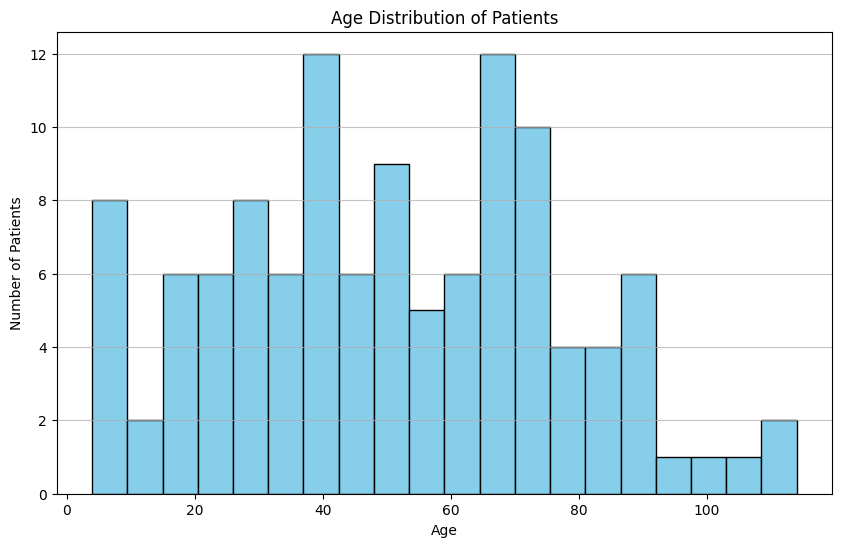

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(patientFrame['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Great job!, you have completed the workbook.

## Want to learn more about Pandas?

### Check out the video, Complete Pandas Data Science Totutorial (2024 Updated Edition) by Keith Galli

##### https://www.youtube.com/watch?v=2uvysYbKdjM